## Real-Fake Job Posting Predictions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=585315a395969675c3f41735d918694805c6e3b57a58d3d8aa697601a06a516f
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [4]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries

import pandasql as psql

In [8]:
import pandas as pd

# Specify the file path and name
file_path = "/content/drive/MyDrive/Real-Fake-Job-Postings prject/fake_job_postings.csv"

# Read the CSV file
real = pd.read_csv(file_path)


# Display first 5 records

real.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [13]:
# checking duplicate values values
real.duplicated().any()

False

In [14]:
# checking null value sum
real.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [15]:
# identifying unique values
real.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [16]:
for i in real.columns:
    print(real[i].value_counts())

1        1
11919    1
11925    1
11924    1
11923    1
        ..
5966     1
5967     1
5968     1
5969     1
17880    1
Name: job_id, Length: 17880, dtype: int64
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64
GB, LND, London          718
US, NY, New York         658
U

In [17]:
# SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)
# to fill null values we use simpleimputer and knn imputer

from sklearn.impute import SimpleImputer

imputer_si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

for col in real.columns:
    if real[col].dtypes == 'object':
        real[col] = imputer_si.fit_transform(real[[col]])


real.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,0-0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0-0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,0-0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,See job description,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0-0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Sales,0-0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [18]:
# coverting categorical objects to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in real.columns:
    if real[col].dtypes == 'object':
        real[col] = le.fit_transform(real[col])

In [19]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_id               17880 non-null  int64
 1   title                17880 non-null  int64
 2   location             17880 non-null  int64
 3   department           17880 non-null  int64
 4   salary_range         17880 non-null  int64
 5   company_profile      17880 non-null  int64
 6   description          17880 non-null  int64
 7   requirements         17880 non-null  int64
 8   benefits             17880 non-null  int64
 9   telecommuting        17880 non-null  int64
 10  has_company_logo     17880 non-null  int64
 11  has_questions        17880 non-null  int64
 12  employment_type      17880 non-null  int64
 13  required_experience  17880 non-null  int64
 14  required_education   17880 non-null  int64
 15  industry             17880 non-null  int64
 16  function             1

In [20]:
# Count the target or dependent variable by '0' & '1' and their proportion
# (> 10 : 1, then the dataset is imbalance data)

fraud_count = real.fraudulent.value_counts()
print('Class 0:',fraud_count[0])

print('Class 1:', fraud_count[1])
print('Proportion:', round(fraud_count[0] / fraud_count[1], 2), ': 1')
print('Total bc records:', len(real))

Class 0: 17014
Class 1: 866
Proportion: 19.65 : 1
Total bc records: 17880


In [21]:
# Identify the independent and Target variables

IndepVar = []
for col in real.columns:
    if col != 'fraudulent':
        IndepVar.append(col)

TargetVar = 'fraudulent'

x = real[IndepVar]
y = real[TargetVar]

In [22]:
# Random oversampling can be implemented using the RandomOverSampler class to control imbalnce

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.15)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(19566, 17)
(19566,)


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=76)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((13696, 17), (5870, 17), (13696,), (5870,))

In [24]:
real.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

Text(0.5, 0, 'Attributes')

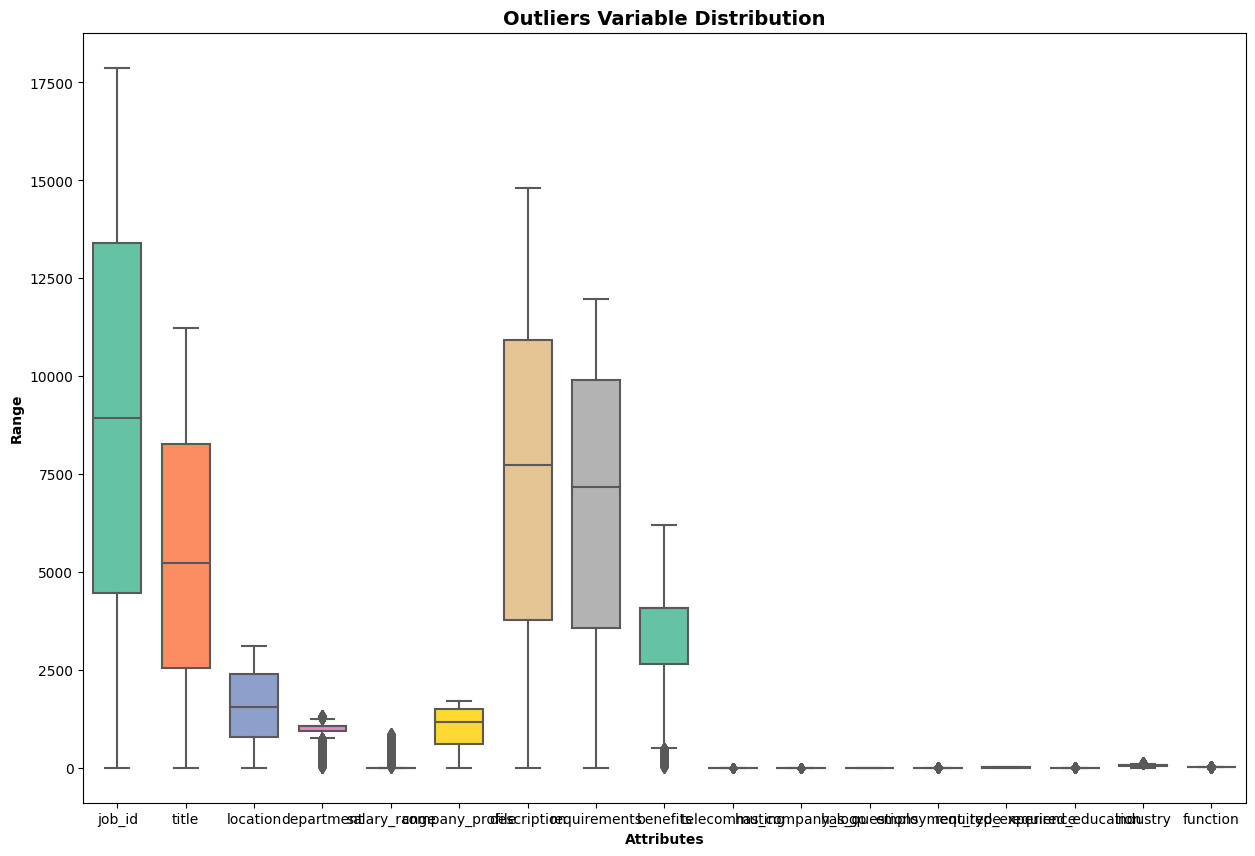

In [27]:
# Outlier Analysis

import seaborn as sns

variables = ['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']
plt.rcParams['figure.figsize'] = [15,10]
sns.boxplot(data = real[variables], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [28]:
file_path = "/content/drive/MyDrive/Real-Fake-Job-Postings prject/HTResults.csv"

# Read the CSV file
HTResults = pd.read_csv(file_path)


# WORKING WITH TOP 10 ALGORITHMS

Model Name:  LogisticRegression()
Confusion matrix : 
 [[  42  728]
 [  68 5032]]
Outcome values : 
 42 728 68 5032
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.05      0.10       770
           0       0.87      0.99      0.93      5100

    accuracy                           0.86      5870
   macro avg       0.63      0.52      0.51      5870
weighted avg       0.81      0.86      0.82      5870

Accuracy : 86.4 %
Precision : 38.2 %
Recall : 5.5 %
F1 Score : 0.095
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 52.1 %
roc_auc_score: 0.521


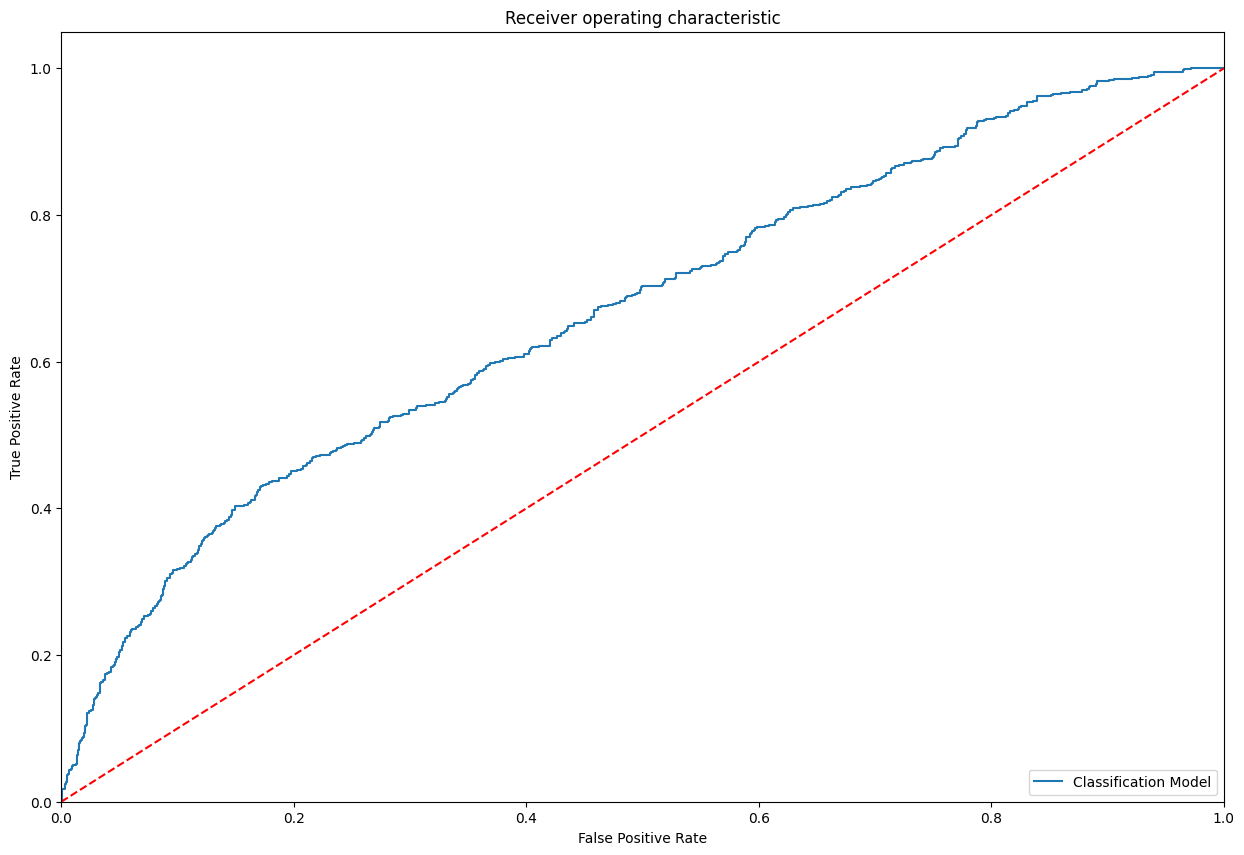

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 760   10]
 [  95 5005]]
Outcome values : 
 760 10 95 5005
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.99      0.94       770
           0       1.00      0.98      0.99      5100

    accuracy                           0.98      5870
   macro avg       0.94      0.98      0.96      5870
weighted avg       0.98      0.98      0.98      5870

Accuracy : 98.2 %
Precision : 88.9 %
Recall : 98.7 %
F1 Score : 0.935
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 98.4 %
roc_auc_score: 0.984


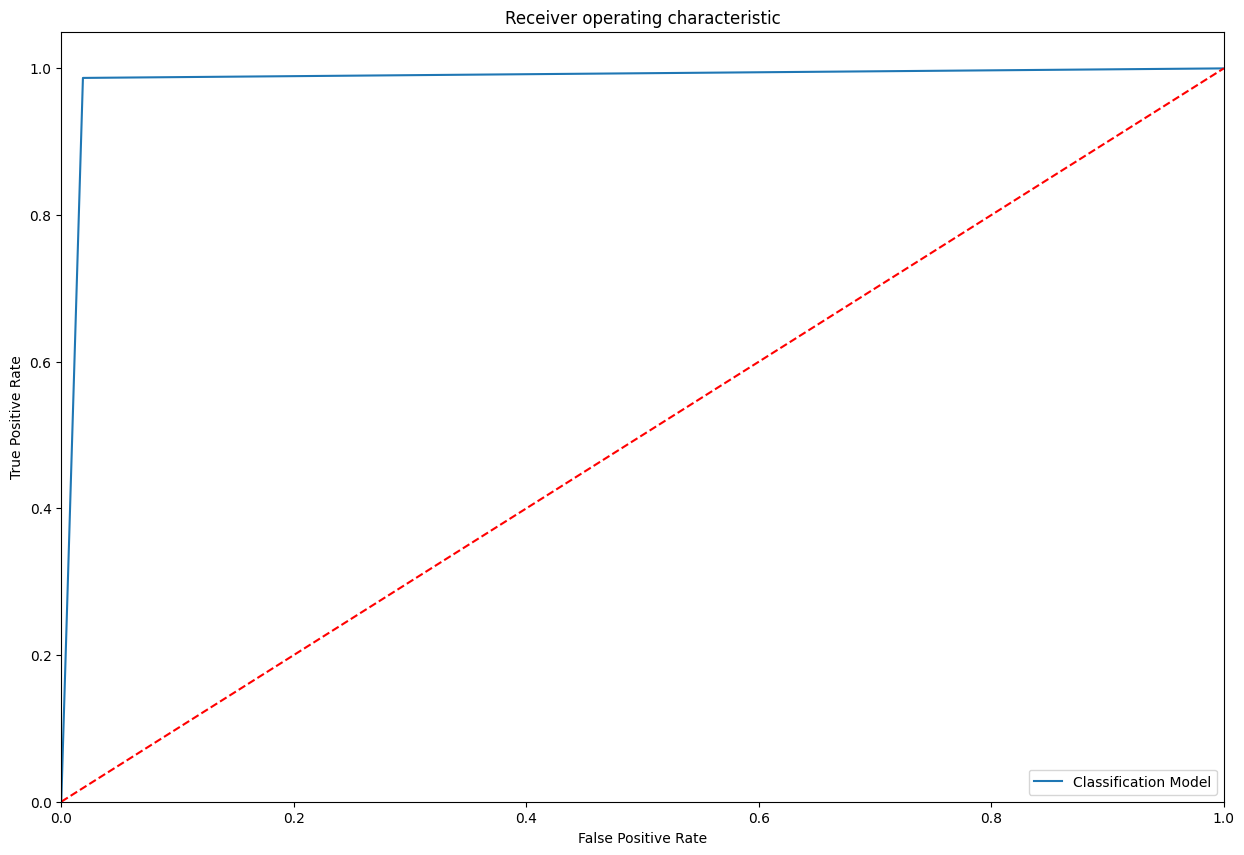

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 750   20]
 [   7 5093]]
Outcome values : 
 750 20 7 5093
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.97      0.98       770
           0       1.00      1.00      1.00      5100

    accuracy                           1.00      5870
   macro avg       0.99      0.99      0.99      5870
weighted avg       1.00      1.00      1.00      5870

Accuracy : 99.5 %
Precision : 99.1 %
Recall : 97.4 %
F1 Score : 0.982
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 98.6 %
roc_auc_score: 0.986


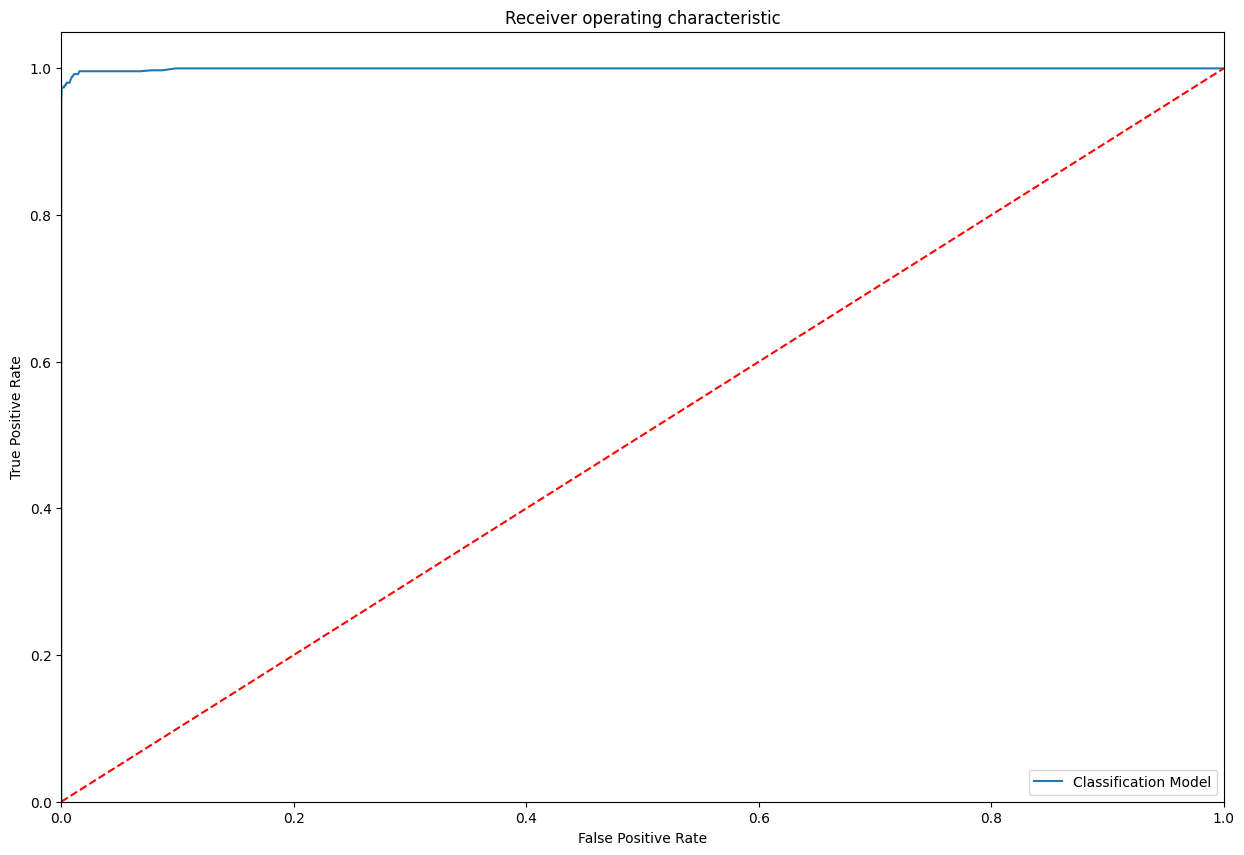

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 733   37]
 [   5 5095]]
Outcome values : 
 733 37 5 5095
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.95      0.97       770
           0       0.99      1.00      1.00      5100

    accuracy                           0.99      5870
   macro avg       0.99      0.98      0.98      5870
weighted avg       0.99      0.99      0.99      5870

Accuracy : 99.3 %
Precision : 99.3 %
Recall : 95.2 %
F1 Score : 0.972
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 97.6 %
roc_auc_score: 0.975


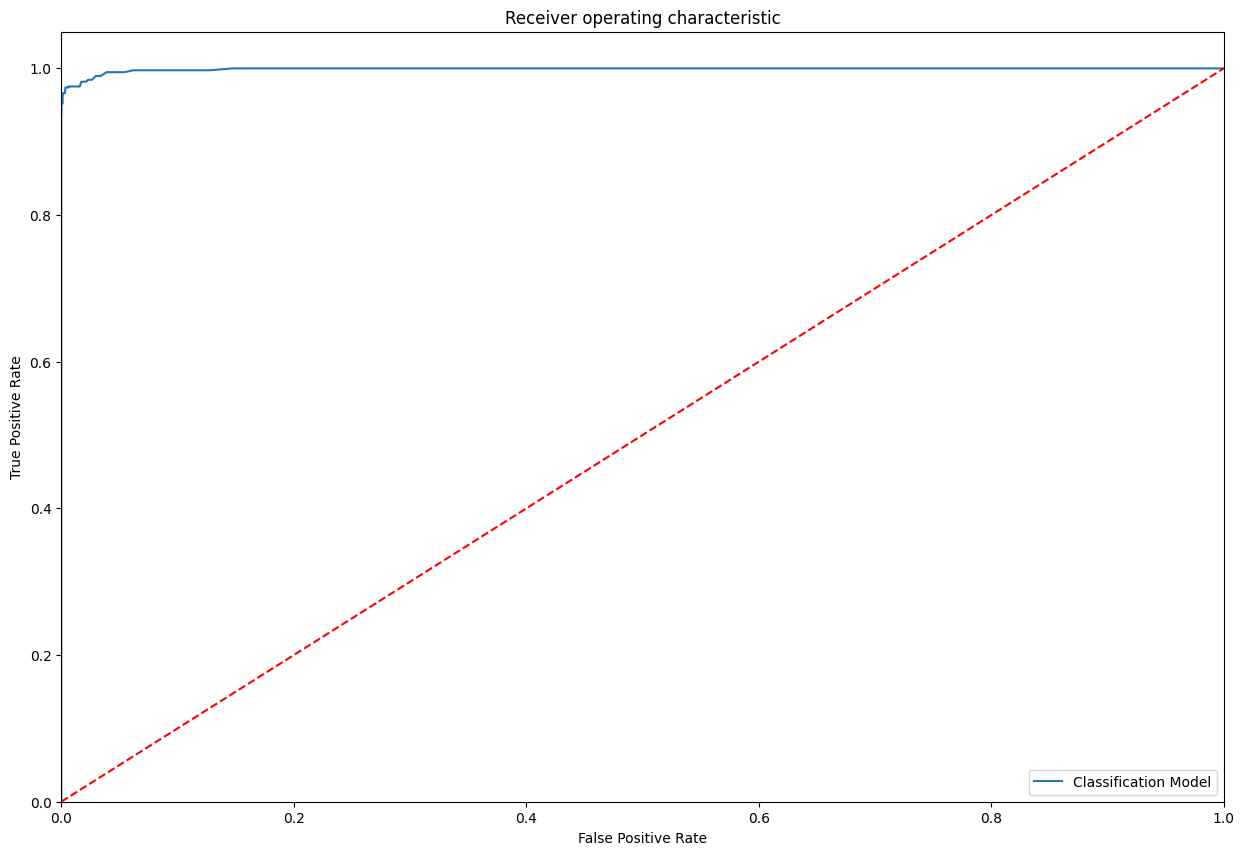

-----------------------------------------------------------------------------------------------------


In [ ]:
# Build the Calssification models with Over Sampling and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelEX=ExtraTreesClassifier()
bankdataSVMPoly = SVC(kernel='poly', degree=2, probability=True)
modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)
ModelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)
ModelLGB = lgb.LGBMClassifier()
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
 bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
 n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF,ModelEX,bankdataSVMPoly,modelGNB,ModelKNN,ModelLGB,modelBAG,ModelGB]
for models in MM:

    # Assign values

    #x_train = xo_train
    #x_test = xo_test
    #y_train = yo_train
    #y_test = yo_test

    # Train the model training dataset

    models.fit(x_train, y_train)

    # Prediction the model with test dataset

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------

    #----------------------------------------------------------------------------------------------------------
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn,
               'False Positive': fp,
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    HTResults = HTResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [ ]:


HTResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),27,743,39,5061,0.867,0.409,0.035,0.065,0.992,MCC,0.513709,0.514
1,DecisionTreeClassifier(),748,22,90,5010,0.981,0.893,0.971,0.930,0.982,MCC,0.976891,0.976
2,"(DecisionTreeClassifier(max_features='auto', r...",750,20,4,5096,0.996,0.995,0.974,0.984,0.999,MCC,0.986621,0.986
3,"(ExtraTreeClassifier(random_state=194530551), ...",735,35,5,5095,0.993,0.993,0.955,0.974,0.999,MCC,0.976783,0.977
4,"SVC(degree=2, kernel='poly', probability=True)",0,770,0,5100,0.869,NaN,0.000,0.000,1.000,MCC,0.500000,0.500
5,GaussianNB(),310,460,340,4760,0.864,0.477,0.403,0.437,0.933,MCC,0.667965,0.668
6,KNeighborsClassifier(),559,211,228,4872,0.925,0.710,0.726,0.718,0.955,MCC,0.840634,0.840
7,LGBMClassifier(),734,36,17,5083,0.991,0.977,0.953,0.965,0.997,MCC,0.974957,0.975
8,(DecisionTreeClassifier(random_state=186000534...,751,19,19,5081,0.994,0.975,0.975,0.975,0.996,MCC,0.985800,0.986
9,([DecisionTreeRegressor(criterion='friedman_ms...,574,196,22,5078,0.963,0.963,0.745,0.840,0.996,MCC,0.870570,0.870


# HYPERPARAMETER TUNING RANDOMISED SEARCH

In [ ]:
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# splitter in Decision Tree

splitter = ['best', 'random']

# Number of features to consider at every split

max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid

Random_Grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

print(Random_Grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

ModelDT = DecisionTreeClassifier()

ModelDT_RandomCV=RandomizedSearchCV(estimator=ModelDT, param_distributions=Random_Grid, n_iter=100, cv=3,
                                    verbose=2, random_state=100,n_jobs=-1)
### fit the randomized model

ModelDT_RandomCV.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [ ]:
# best or the optimal values of the parameters for which the model performed the best

ModelDT_RandomCV.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 120,
 'criterion': 'gini'}

Confusion matrix : 
 [[ 723   47]
 [  96 5004]]
Outcome values : 
 723 47 96 5004
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.94      0.91       770
           0       0.99      0.98      0.99      5100

    accuracy                           0.98      5870
   macro avg       0.94      0.96      0.95      5870
weighted avg       0.98      0.98      0.98      5870

Accuracy : 97.6 %
Precision : 88.3 %
Recall : 93.9 %
F1 Score : 0.91
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 96.0 %
MCC : 0.897
roc_auc_score: 0.96


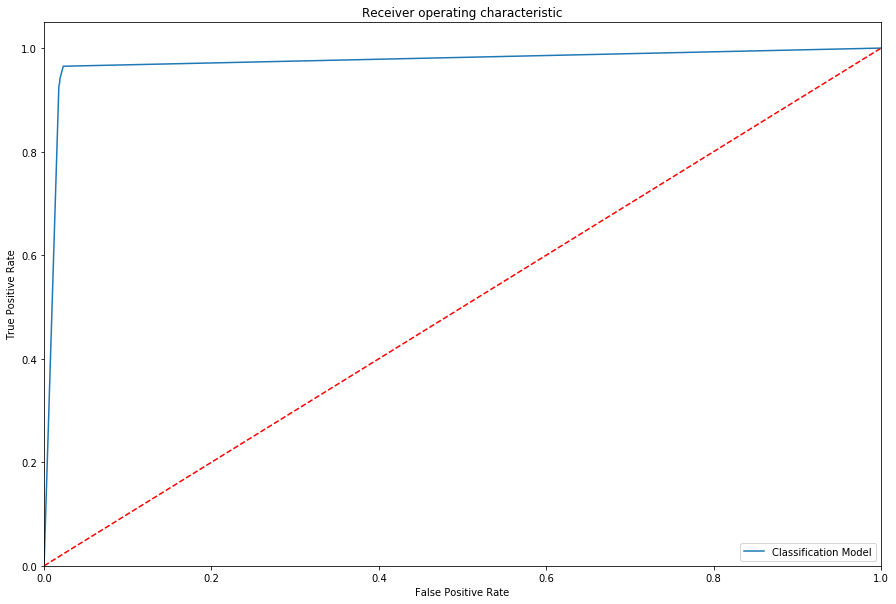

-----------------------------------------------------------------------------------------------------


In [ ]:
# To build the 'Decision Tree' model Random sampling - Hyperparameter tuning with RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier

ModelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=120, max_features='auto',
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=5,min_weight_fraction_leaf=0.0,
                                 random_state=42, splitter='best')

# Train the model with train data

ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelDT,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

# HYPERPARAMETER TUNING GRID-SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search

Grid_Params = {'max_depth': [2, 3, 5, 10, 20],
               'min_samples_leaf': [5, 10, 20, 50, 100],
               'criterion': ["gini", "entropy"]
               }

ModelDT = DecisionTreeClassifier(random_state=42)

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator=ModelDT, param_grid=Grid_Params, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [ ]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

Confusion matrix : 
 [[ 691   79]
 [  99 5001]]
Outcome values : 
 691 79 99 5001
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.90      0.89       770
           0       0.98      0.98      0.98      5100

    accuracy                           0.97      5870
   macro avg       0.93      0.94      0.93      5870
weighted avg       0.97      0.97      0.97      5870

Accuracy : 97.0 %
Precision : 87.5 %
Recall : 89.7 %
F1 Score : 0.886
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 93.9 %
MCC : 0.869
roc_auc_score: 0.939


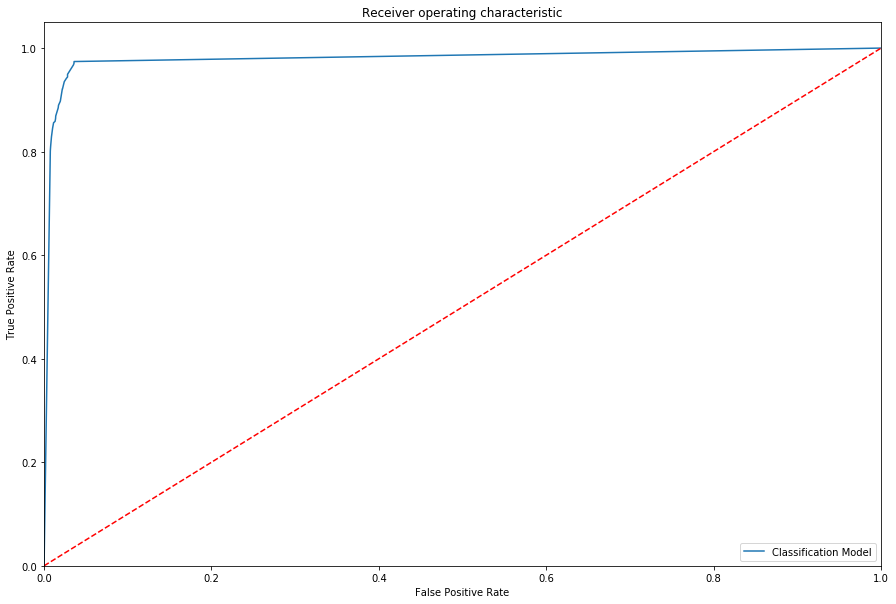

-----------------------------------------------------------------------------------------------------


In [ ]:
# To build the 'Decision Tree' model Random sampling - Hyperparameter tuning with GridSearchCV

from sklearn.tree import DecisionTreeClassifier

ModelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=20, max_features=None,
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=5, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                 random_state=None, splitter='best')

# Train the model with train data

ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelDT,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [ ]:
HTResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),27,743,39,5061,0.867,0.409,0.035,0.065,0.992,MCC,0.513709,0.514
1,DecisionTreeClassifier(),748,22,90,5010,0.981,0.893,0.971,0.930,0.982,MCC,0.976891,0.976
2,"(DecisionTreeClassifier(max_features='auto', r...",750,20,4,5096,0.996,0.995,0.974,0.984,0.999,MCC,0.986621,0.986
3,"(ExtraTreeClassifier(random_state=194530551), ...",735,35,5,5095,0.993,0.993,0.955,0.974,0.999,MCC,0.976783,0.977
4,"SVC(degree=2, kernel='poly', probability=True)",0,770,0,5100,0.869,NaN,0.000,0.000,1.000,MCC,0.500000,0.500
5,GaussianNB(),310,460,340,4760,0.864,0.477,0.403,0.437,0.933,MCC,0.667965,0.668
6,KNeighborsClassifier(),559,211,228,4872,0.925,0.710,0.726,0.718,0.955,MCC,0.840634,0.840
7,LGBMClassifier(),734,36,17,5083,0.991,0.977,0.953,0.965,0.997,MCC,0.974957,0.975
8,(DecisionTreeClassifier(random_state=186000534...,751,19,19,5081,0.994,0.975,0.975,0.975,0.996,MCC,0.985800,0.986
9,([DecisionTreeRegressor(criterion='friedman_ms...,574,196,22,5078,0.963,0.963,0.745,0.840,0.996,MCC,0.870570,0.870
